In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# knn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
filename = "Population estimates by gender nationality and region 2010 - 2022_data.csv"

df = pd.read_csv(filename)
df["Year"] = df["Year"].str.replace(",", '')
df["Population estimates"] = df["Population estimates"].str.replace(",", '')
df["Year"]=df["Year"].astype(int)
df["Population estimates"]=df["Population estimates"].astype(int)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Region                676 non-null    object
 1   Year                  676 non-null    int32 
 2   Gender                676 non-null    object
 3   Nationality           676 non-null    object
 4   Population estimates  676 non-null    int32 
dtypes: int32(2), object(3)
memory usage: 21.2+ KB
None


In [4]:
print(df.head())

           Region  Year  Gender Nationality  Population estimates
0         Madinah  2014  Female       Saudi                562344
1          Tabouk  2010  Female       Saudi                239792
2            Hail  2013  Female       Saudi                211727
3  Eastern Region  2016    Male       Saudi               1308467
4         Al-Baha  2018  Female   Non-Saudi                 16951


In [5]:
df["Region"] = LabelEncoder().fit_transform(df["Region"])
df["Nationality"] = LabelEncoder().fit_transform(df["Nationality"])
accuracies = []

In [73]:
print(accuracies)
accuracies = sorted(accuracies, key = lambda pair: pair[1], reverse = True)
print("Top classificator is", accuracies[0][0],"\nIt`s accuracy is:", accuracies[0][1])

[('kNN', 0.47058823529411764), ('Decision Tree', 0.6666666666666666), ('Support Vector Machine', 0.6551724137931034), ('Adaptive Boosting', 0.6838235294117647)]
Top classificator is Adaptive Boosting 
It`s accuracy is: 0.6838235294117647


In [6]:
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])
df.head()

,Region,Year,Gender,Nationality,Population estimates
0,6,2014,0,1,562344
1,12,2010,0,1,239792
2,4,2013,0,1,211727
3,3,2016,1,1,1308467
4,0,2018,0,0,16951


In [7]:

x = df.drop(['Gender'], axis = 1)
y = df['Gender']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
num_classes = len(y.unique())
print(num_classes)
scaler = MinMaxScaler()
scaler.fit(x_train)
scaled_X_train = scaler.transform(x_train) 
scaled_X_test = scaler.transform(x_test)

2


In [59]:
model = keras.Sequential([layers.Dense(8, activation='tanh'),
                          layers.Dense(1, activation="sigmoid")])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
history = model.fit(scaled_X_train,
                    y_train,
                    epochs=10,
                    batch_size=16,
                    validation_split=0.2,
                    verbose = 2)

Epoch 1/10
27/27 - 1s - loss: 0.7078 - accuracy: 0.5069 - val_loss: 0.7129 - val_accuracy: 0.4352 - 716ms/epoch - 27ms/step
Epoch 2/10
27/27 - 0s - loss: 0.7043 - accuracy: 0.5023 - val_loss: 0.7096 - val_accuracy: 0.4444 - 74ms/epoch - 3ms/step
Epoch 3/10
27/27 - 0s - loss: 0.7015 - accuracy: 0.5023 - val_loss: 0.7072 - val_accuracy: 0.4537 - 74ms/epoch - 3ms/step
Epoch 4/10
27/27 - 0s - loss: 0.7002 - accuracy: 0.4907 - val_loss: 0.7039 - val_accuracy: 0.4352 - 74ms/epoch - 3ms/step
Epoch 5/10
27/27 - 0s - loss: 0.6974 - accuracy: 0.4954 - val_loss: 0.7020 - val_accuracy: 0.4815 - 75ms/epoch - 3ms/step
Epoch 6/10
27/27 - 0s - loss: 0.6949 - accuracy: 0.4884 - val_loss: 0.6998 - val_accuracy: 0.5000 - 70ms/epoch - 3ms/step
Epoch 7/10
27/27 - 0s - loss: 0.6929 - accuracy: 0.4884 - val_loss: 0.6978 - val_accuracy: 0.5000 - 73ms/epoch - 3ms/step
Epoch 8/10
27/27 - 0s - loss: 0.6914 - accuracy: 0.4815 - val_loss: 0.6958 - val_accuracy: 0.5000 - 78ms/epoch - 3ms/step
Epoch 9/10
27/27 - 0s 

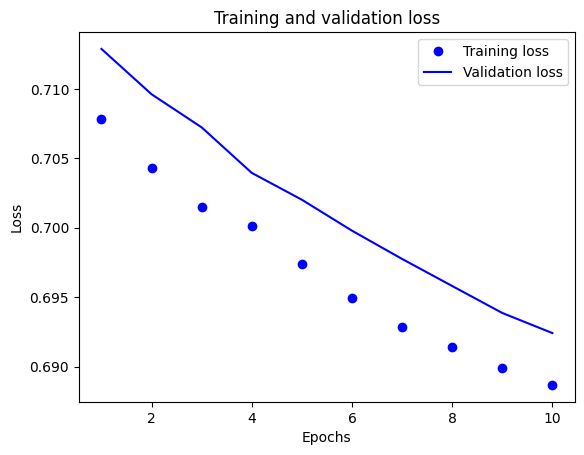

In [60]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [61]:
score = model.evaluate(scaled_X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.6835499405860901
Test accuracy: 0.6176470518112183


In [12]:
import os
from PIL import Image
# from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [13]:
data_dir = 'animal_dataset_intermediate\\train'
image_paths = []
classes = []
class_names = os.listdir(data_dir)
for class_name in class_names[:3]:
    class_dir = os.path.join(data_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image_paths.append(image_path)
        classes.append(class_name)

In [14]:
print(len(image_paths), len(classes))

4882 4882


In [15]:
def open_images(image_paths, classes):
    images = np.empty((len(image_paths), 200, 200, 3), dtype=np.ndarray)
    del_indexes = []
    for i, image_path in enumerate(image_paths):
        image = Image.open(image_path)
        resized_image = image.resize((200, 200))
        image.close()
        array_image = np.asarray(resized_image)
        if array_image.shape[2] != 3:
            del_indexes.append(i)
            continue
        images[i] = array_image
    del_indexes.sort(reverse=True)
    for index in del_indexes:
        del classes[index]
    mask = ~np.all(images == None, axis = (1, 2, 3))  # знаходимо елементи, які не є NaN
    images = images[mask]
    return images

In [16]:
images = open_images(image_paths, classes)

In [17]:
print(images.shape, len(classes))

(4849, 200, 200, 3) 4849


In [19]:
x = images.astype('float32') / 255
y = LabelEncoder().fit_transform(classes)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [77]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('image shape', x_train.shape)

3879 train samples
970 test samples
image shape (3879, 200, 200, 3)


In [25]:
np.unique(y_train)
indices = np.where(y_train == 0)[0]
print(indices[0])

0


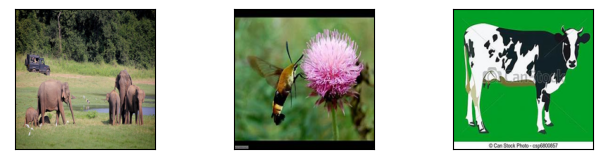

In [26]:
n = 3  
plt.figure(figsize=(8, 4))
for i in range(n):
    index = np.where(y_train == i)[0][0]
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [27]:
num_classes = 3
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [28]:
model =  keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 98, 98, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 98, 98, 64)        0         
                                                                 
 flatten (Flatten)           (None, 614656)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               78676096  
                                                      

In [30]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
31/31 [==============================] - 157s 4s/step - loss: 3.2461 - accuracy: 0.4795 - val_loss: 0.7436 - val_accuracy: 0.6371
Epoch 2/12
31/31 [==============================] - 120s 4s/step - loss: 0.6546 - accuracy: 0.6917 - val_loss: 0.6231 - val_accuracy: 0.7165
Epoch 3/12
31/31 [==============================] - 117s 4s/step - loss: 0.5086 - accuracy: 0.7940 - val_loss: 0.4723 - val_accuracy: 0.8093
Epoch 4/12
31/31 [==============================] - 118s 4s/step - loss: 0.3107 - accuracy: 0.8891 - val_loss: 0.4334 - val_accuracy: 0.8144
Epoch 5/12
31/31 [==============================] - 119s 4s/step - loss: 0.1893 - accuracy: 0.9356 - val_loss: 0.4543 - val_accuracy: 0.8299
Epoch 6/12
31/31 [==============================] - 118s 4s/step - loss: 0.1078 - accuracy: 0.9665 - val_loss: 0.4977 - val_accuracy: 0.8247
Epoch 7/12
31/31 [==============================] - 119s 4s/step - loss: 0.0585 - accuracy: 0.9848 - val_loss: 0.5277 - val_accuracy: 0.8278
Epoch 8/12
31

In [31]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.6770473718643188
Test accuracy: 0.8216494917869568


In [32]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [33]:
data = pd.read_json("data.json", lines=True, encoding = "latin-1")

In [34]:
data["fit"].unique()

array(['fit', 'small', 'large'], dtype=object)

In [35]:
data.loc[data['fit'].isin(["small", "large"]), 'fit'] = "unfit"

In [36]:
data = data[["fit", "review_text"]]

In [37]:
data['fit'].value_counts()

fit      142058
unfit     50486
Name: fit, dtype: int64

In [38]:
data = data.sample(frac=1)

In [39]:
data = data[:50000]
data.shape

(50000, 2)

In [40]:
data['fit'].value_counts()

fit      37045
unfit    12955
Name: fit, dtype: int64

In [41]:
stop_words = stopwords.words('english')
stop_words.append("dress")
stop_words.append("fit")
stop_words.append("look")
stop_words.append("comfort")
stop_words.append("perfect")
stop_words.append("color")
stop_words.append("top")
stop_words.append("wore")

In [42]:
def text_cleaner(text):
    text = text.lower()
    text = re.sub("\d", "", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), "", text)
    text = re.sub('\n', "", text)
    text = re.sub('\s{2,}',"", text)
    text_tokens = word_tokenize(text)
    filtered_text = []
    for w in text_tokens:
        if w not in stop_words:
            filtered_text.append(w)
    # stemmer = PorterStemmer()
    # text = [stemmer.stem(t) for t in filtered_text]
    # return text
    return filtered_text

In [43]:
print(data.head())
data["review_text"] = data["review_text"].apply(text_cleaner)
print(data.head())

        fit                                        review_text
57446   fit  I loved this dress! It was very comfortable al...
65762   fit  Fit: One size up!\nI am 5'0" and wore 2-inch h...
139965  fit  The fit was fine. However, it's not as pretty ...
184872  fit  I loved this dress so much.  I wore it to work...
126149  fit  I am 5"5 and 36C, and short wasted. This was a...


        fit                                        review_text
57446   fit  [loved, comfortable, evening, slits, fun, touc...
65762   fit  [one, size, upi, amand, inch, heels, would, lo...
139965  fit     [fine, however, pretty, person, looks, photos]
184872  fit  [loved, muchi, work, black, knit, stockings, b...
126149  fit  [amand, c, short, wasted, stores, well, ironin...


In [44]:
x = data.drop(['fit'], axis = 1)
y = LabelEncoder().fit_transform(data['fit'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# y_train = keras.utils.to_categorical(y_train, 2)
# y_test = keras.utils.to_categorical(y_test, 2)

In [45]:
print(y_train)

[1 0 1 ... 1 1 1]


In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [47]:
x_train["review_text"]

113122        [big, ordered, xsi, back, closet, able, wear]
129065    [okay, story, ordered, p, p, banking, wearing,...
19246     [loved, little, tight, wear, something, else, ...
175347    [rented, regular, long, length, ”, heels, regu...
14657     [glad, got, large, backup, medium, way, tight,...
                                ...                        
126890    [rented, birthday, first, one, ordered, didnt,...
3731      [perfectly, xs, normally, dresses, rtr, tradit...
160987    [definitely, needed, medium, wear, large, unfl...
127029    [really, loved, fabric, great, really, keeps, ...
142563    [hesitant, order, online, back, read, reviews,...
Name: review_text, Length: 40000, dtype: object

In [48]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train["review_text"])
sequences = tokenizer.texts_to_sequences(x_train["review_text"])

In [49]:
word_index = tokenizer.word_index
num_unique_words = len(word_index)

In [50]:
maxlen = 200
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post')

In [51]:
# tokenizer2 = Tokenizer()
# tokenizer2.fit_on_texts(x_test["review_text"])
sequences2 = tokenizer.texts_to_sequences(x_test["review_text"])
padded_sequences2 = pad_sequences(sequences2, maxlen=maxlen, padding='post')


In [52]:
print(len(padded_sequences2),len(padded_sequences))

10000 40000


In [53]:
model =  keras.Sequential([keras.Input(shape=(None,), dtype="int64"),
                          layers.Embedding(num_unique_words+1, output_dim=128),
                          layers.LSTM(128),
                          layers.Dropout(0.2),
                          layers.Dense(1, activation='sigmoid')])


In [54]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(padded_sequences,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    verbose = 1)

Epoch 1/10


250/250 [==============================] - 62s 240ms/step - loss: 0.5774 - accuracy: 0.7374 - val_loss: 0.5716 - val_accuracy: 0.7426
Epoch 2/10
250/250 [==============================] - 58s 232ms/step - loss: 0.5758 - accuracy: 0.7390 - val_loss: 0.5709 - val_accuracy: 0.7426
Epoch 3/10
250/250 [==============================] - 58s 233ms/step - loss: 0.5750 - accuracy: 0.7390 - val_loss: 0.5712 - val_accuracy: 0.7426
Epoch 4/10
250/250 [==============================] - 58s 234ms/step - loss: 0.5751 - accuracy: 0.7390 - val_loss: 0.5711 - val_accuracy: 0.7426
Epoch 5/10
250/250 [==============================] - 58s 234ms/step - loss: 0.5749 - accuracy: 0.7390 - val_loss: 0.5710 - val_accuracy: 0.7426
Epoch 6/10
250/250 [==============================] - 58s 233ms/step - loss: 0.5751 - accuracy: 0.7390 - val_loss: 0.5703 - val_accuracy: 0.7426
Epoch 7/10
250/250 [==============================] - 58s 232ms/step - loss: 0.5750 - accuracy: 0.7390 - val_loss: 0.5711 - val_accuracy: 0.7

In [55]:
score = model.evaluate(padded_sequences2, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.5691758990287781
Test accuracy: 0.7457000017166138
